<a href="https://colab.research.google.com/github/robertozerbini/blog/blob/add-license-1/Roberto_Zerbini's_Blog_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
import sklearn 

axes = [-2.5, 2.5, -3.5, 3.5]

#Get Data

In [ ]:
#generate data
def get_data(m):
  np.random.seed(3)
  X = np.random.randn(m, 1)
  y = np.sin(3 * X) + np.random.randn(m, 1) *.5
  return X,y

In [ ]:
X,y = get_data(500)

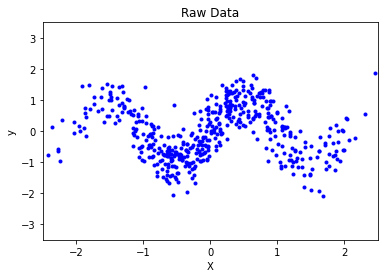

In [ ]:
fig, ax = plt.subplots()
plt.title('Raw Data')
ax.plot(X, y, "b.") 
ax.axis(axes)
ax.set_xlabel("X")
ax.set_ylabel("y")
plt.show()

#Train Linear Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error 

y_test_prediction = lin_reg.predict(X_test)
lin_mse_test = mean_squared_error(y_test, y_test_prediction)

lin_mse_test

0.6808472606336224

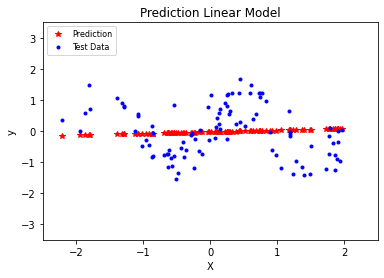

In [ ]:
fig, ax = plt.subplots()
plt.title('Prediction Linear Model')
plt.axis(axes)

ax.plot(X_test, y_test_prediction, "r*", label = 'Prediction') 
ax.plot(X_test, y_test, "b.", label = 'Test Data') 
ax.axis(axes)
ax.set_xlabel("X")
ax.set_ylabel("y")

plt.legend(loc="upper left", fontsize=8)
plt.show()

#Train Polynomial Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 8
pl = PolynomialFeatures(degree = degree)

X_train_p = pl.fit_transform(X_train)
X_test_p = pl.fit_transform(X_test)

In [ ]:
print('Number of features X = {} Number of features X_poly = {}'.format(X_train.shape[1], X_train_p.shape[1]))

Number of features X = 1 Number of features X_poly = 9


In [ ]:
poly_reg = LinearRegression() 
poly_reg.fit(X_train_p, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_prediction_p = poly_reg.predict(X_train_p)
poly_mse_train = mean_squared_error(y_train, y_prediction_p)

In [ ]:
y_test_prediction_p = poly_reg.predict(X_test_p)
poly_mse_test = mean_squared_error(y_test, y_test_prediction_p)

In [ ]:
print("MSE linear: {} MSE polynomial: {} %difference {}".format(lin_mse_test, poly_mse_test, 1- poly_mse_test / lin_mse_test))

MSE linear: 0.6808472606336224 MSE polynomial: 0.3598539136348059 %difference 0.4714616119628474


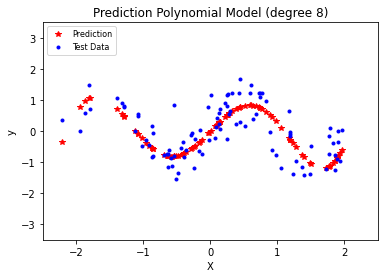

In [ ]:
fig, ax = plt.subplots()
plt.title('Prediction Polynomial Model (degree ' + str(degree) + ')')
plt.axis(axes)

ax.plot(X_test, y_test_prediction_p, "r*", label = 'Prediction') 
ax.plot(X_test, y_test, "b.", label = 'Test Data') 
ax.axis(axes)
ax.set_xlabel("X")
ax.set_ylabel("y")

plt.legend(loc="upper left", fontsize=8)
plt.show()

#Variance Analysis

In [ ]:
percent_diff = []
mse_train = []
mse_test = []
iter = 17
for d in range(iter):

  pl = PolynomialFeatures(degree = d)

  X_train_p = pl.fit_transform(X_train)
  X_test_p = pl.fit_transform(X_test)

  lin_reg = LinearRegression() 
  lin_reg.fit(X_train_p, y_train)

  y_prediction_p = lin_reg.predict(X_train_p)
  lin_mse_train_p = mean_squared_error(y_train, y_prediction_p)

  y_test_prediction_p = lin_reg.predict(X_test_p)
  lin_mse_test_p = mean_squared_error(y_test, y_test_prediction_p)

  mse_train.append(lin_mse_train_p)
  mse_test.append(lin_mse_test_p)  
  percent_diff.append(1- lin_mse_test_p / lin_mse_train_p)

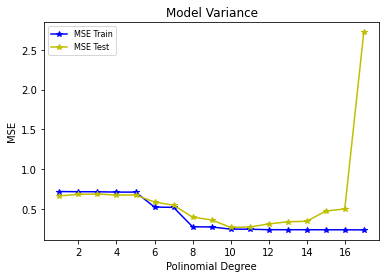

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(1,iter,num=iter), mse_train, "b-*", label = 'MSE Train')
ax.plot(np.linspace(1,iter,num=iter), mse_test, "y-*", label = 'MSE Test')  
ax.set_xlabel("Polinomial Degree")
ax.set_ylabel("MSE")
plt.legend(loc="upper left", fontsize=8)
plt.title('Model Variance')
plt.show()